In [1]:
import numpy as np
import pandas as pd
import lightgbm
from sklearn.model_selection import train_test_split

In [2]:
train_path = '../DATA/train_normalized_4labels.csv'
test_path = '../DATA/test_normalized_4labels.csv'

In [3]:
raw_data = pd.read_csv(train_path,index_col=0)

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [22]:
data = pd.DataFrame()
n_sample = 24748
# 'CERTIFIED': 1502699, 'CERTIFIED-WITHDRAWN': 122582, 'WITHDRAWN': 54542, 'DENIED': 24748
for c in ['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED', 'WITHDRAWN']:
    T = raw_data[raw_data['CASE_STATUS']==c].sample(n_sample)
    data = data.append(T)
data.columns = raw_data.columns

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,FULL_TIME_POSITION,total_wage,CASE_STATUS,CASE_DURATION,EMPLOYMENT_DURATION,EMPLOYER_APPLICATION_COUNT,EMPLOYER_CERTIFIED_RATE,EMPLOYER_CERTIFIED-WITHDRAWN_RATE,EMPLOYER_DENIED_RATE,EMPLOYER_WITHDRAWN_RATE
799381,0,0,0,0,0,0,0,0,0,0,...,1,-0.011334,CERTIFIED,-0.203980,0.287013,-0.142397,0.382701,-0.237860,-0.211386,-0.228574
1887677,0,0,0,0,0,0,0,0,0,1,...,1,-0.011347,CERTIFIED,-0.203980,0.293395,1.499467,0.653901,-0.592932,-0.045031,-0.347345
2051894,0,0,0,0,0,0,0,0,0,0,...,1,-0.011320,CERTIFIED,-0.196148,-5.098899,-0.421148,0.606910,-0.594953,-0.232216,-0.053290
1919817,0,0,0,0,1,0,0,0,0,0,...,1,-0.011339,CERTIFIED,-0.203980,0.299776,-0.192666,0.450851,-0.435566,-0.166962,-0.057017
1630180,0,0,0,0,0,0,0,0,0,0,...,1,-0.011368,CERTIFIED,-0.219644,0.121097,-0.416085,-0.172296,-0.532278,0.373636,1.034176


In [30]:
X = data.drop(columns = ['EMPLOYER_NAME','CASE_STATUS'])
y = data['CASE_STATUS']
T = {'CERTIFIED':0, 'CERTIFIED-WITHDRAWN':1, 'DENIED':2, 'WITHDRAWN':3}
y = list(map(lambda x:T[x],y))

In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.05, random_state=42)
X_train

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,PREVAILING_WAGE,FULL_TIME_POSITION,total_wage,CASE_DURATION,EMPLOYMENT_DURATION,EMPLOYER_APPLICATION_COUNT,EMPLOYER_CERTIFIED_RATE,EMPLOYER_CERTIFIED-WITHDRAWN_RATE,EMPLOYER_DENIED_RATE,EMPLOYER_WITHDRAWN_RATE
1525338,0,0,0,0,0,0,0,0,0,0,...,-0.023647,1,0.115901,-0.227476,0.299776,-0.329849,-1.002217,1.324941,-0.124630,-0.061759
1802024,0,1,0,0,0,0,0,0,0,0,...,-0.048247,1,-0.011357,-0.243140,0.293395,-0.422088,0.402585,-0.594953,0.708636,-0.497703
1534668,0,0,0,0,1,0,0,0,0,0,...,0.075196,1,-0.011291,-0.203980,0.299776,-0.418956,-0.340417,0.801815,-0.232216,-0.497703
1358825,0,0,0,0,0,0,0,0,0,0,...,-0.054893,1,-0.011361,-0.196148,0.293395,-0.407524,0.252255,-0.371354,-0.124145,0.237981
1866946,0,0,0,0,0,1,0,0,0,0,...,0.019958,1,-0.011321,-0.250972,0.293395,-0.419739,0.037325,-0.328077,-0.232216,0.756690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231741,0,0,0,0,0,0,0,0,0,0,...,-0.065359,1,-0.011367,-0.203980,0.293395,-0.422923,0.799884,-0.594953,-0.232216,-0.497703
1146713,0,0,0,0,1,0,0,0,0,0,...,-0.068299,0,-0.011368,-0.235308,0.293395,-0.422766,-4.265686,3.541630,3.766406,-0.497703
1361495,0,0,0,0,0,0,0,0,0,0,...,-0.000160,1,-0.011331,-0.235308,0.287013,-0.398336,-2.648710,2.840514,-0.198329,0.952290
1621064,0,0,0,0,0,0,0,0,0,0,...,-0.049428,1,-0.011358,-0.219644,0.293395,-0.411909,0.003411,-0.438856,-0.232216,1.043070


In [34]:
train_data = lightgbm.Dataset(X_train, label=y_train)
valid_data = lightgbm.Dataset(X_valid, label=y_valid)

'auto'

In [35]:
parameters = {
    'objective': 'multiclass',
    'metric': 'multi_error',
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0,
    'num_class':4,
    'deterministic':'true'
}

In [36]:
model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=valid_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[1]	valid_0's multi_error: 0.149697
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_error: 0.155556
[3]	valid_0's multi_error: 0.137172
[4]	valid_0's multi_error: 0.122828
[5]	valid_0's multi_error: 0.122828
[6]	valid_0's multi_error: 0.122626
[7]	valid_0's multi_error: 0.120808
[8]	valid_0's multi_error: 0.119394
[9]	valid_0's multi_error: 0.120202
[10]	valid_0's multi_error: 0.120202
[11]	valid_0's multi_error: 0.120404
[12]	valid_0's multi_error: 0.121414
[13]	valid_0's multi_error: 0.12202
[14]	valid_0's multi_error: 0.119596
[15]	valid_0's multi_error: 0.119798
[16]	valid_0's multi_error: 0.119394
[17]	valid_0's multi_error: 0.1

In [37]:
def calculate_acc(y_test,y_pred):
    labels = [[0,0],[0,0],[0,0],[0,0]] #truth, correct
    for y,yp in zip(y_test,y_pred):
        labels[y][0] += 1
        if y == yp:
            labels[y][1] += 1
    for stat in range(4):
        labels[stat] = labels[stat][1]/labels[stat][0]
    return labels

In [38]:
y_pred = model.predict(X_train).argmax(axis=1)
print("Accuracy on training set:\n",list(zip(['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED', 'WITHDRAWN'],
               calculate_acc(y_train,y_pred))))

Accuracy on training set:
 [('CERTIFIED', 0.924873226232582), ('CERTIFIED-WITHDRAWN', 0.9596225773546413), ('DENIED', 0.8580294142650684), ('WITHDRAWN', 0.8276858977084308)]


In [39]:
y_pred = model.predict(X_valid).argmax(axis=1)
print("Accuracy on validation set:\n",list(zip(['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED', 'WITHDRAWN'],
               calculate_acc(y_valid,y_pred))))

Accuracy on validation set:
 [('CERTIFIED', 0.9188134270101483), ('CERTIFIED-WITHDRAWN', 0.9663934426229508), ('DENIED', 0.853518821603928), ('WITHDRAWN', 0.8198859005704972)]


In [40]:
data = pd.read_csv(test_path,index_col=0)
X_test = data.drop(columns = ['EMPLOYER_NAME','CASE_STATUS'])
y_test = data['CASE_STATUS']
del(data)
T = {'CERTIFIED':0, 'CERTIFIED-WITHDRAWN':1, 'DENIED':2, 'WITHDRAWN':3}
y_test = list(map(lambda x:T[x],y_test))

In [41]:
y_pred = model.predict(X_test).argmax(axis=1)
print("Accuracy on test set:\n",list(zip(['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED', 'WITHDRAWN'],
               calculate_acc(y_test,y_pred))))

Accuracy on test set:
 [('CERTIFIED', 0.9186245661979923), ('CERTIFIED-WITHDRAWN', 0.9548110783287332), ('DENIED', 0.8465962662643787), ('WITHDRAWN', 0.8212620320855615)]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

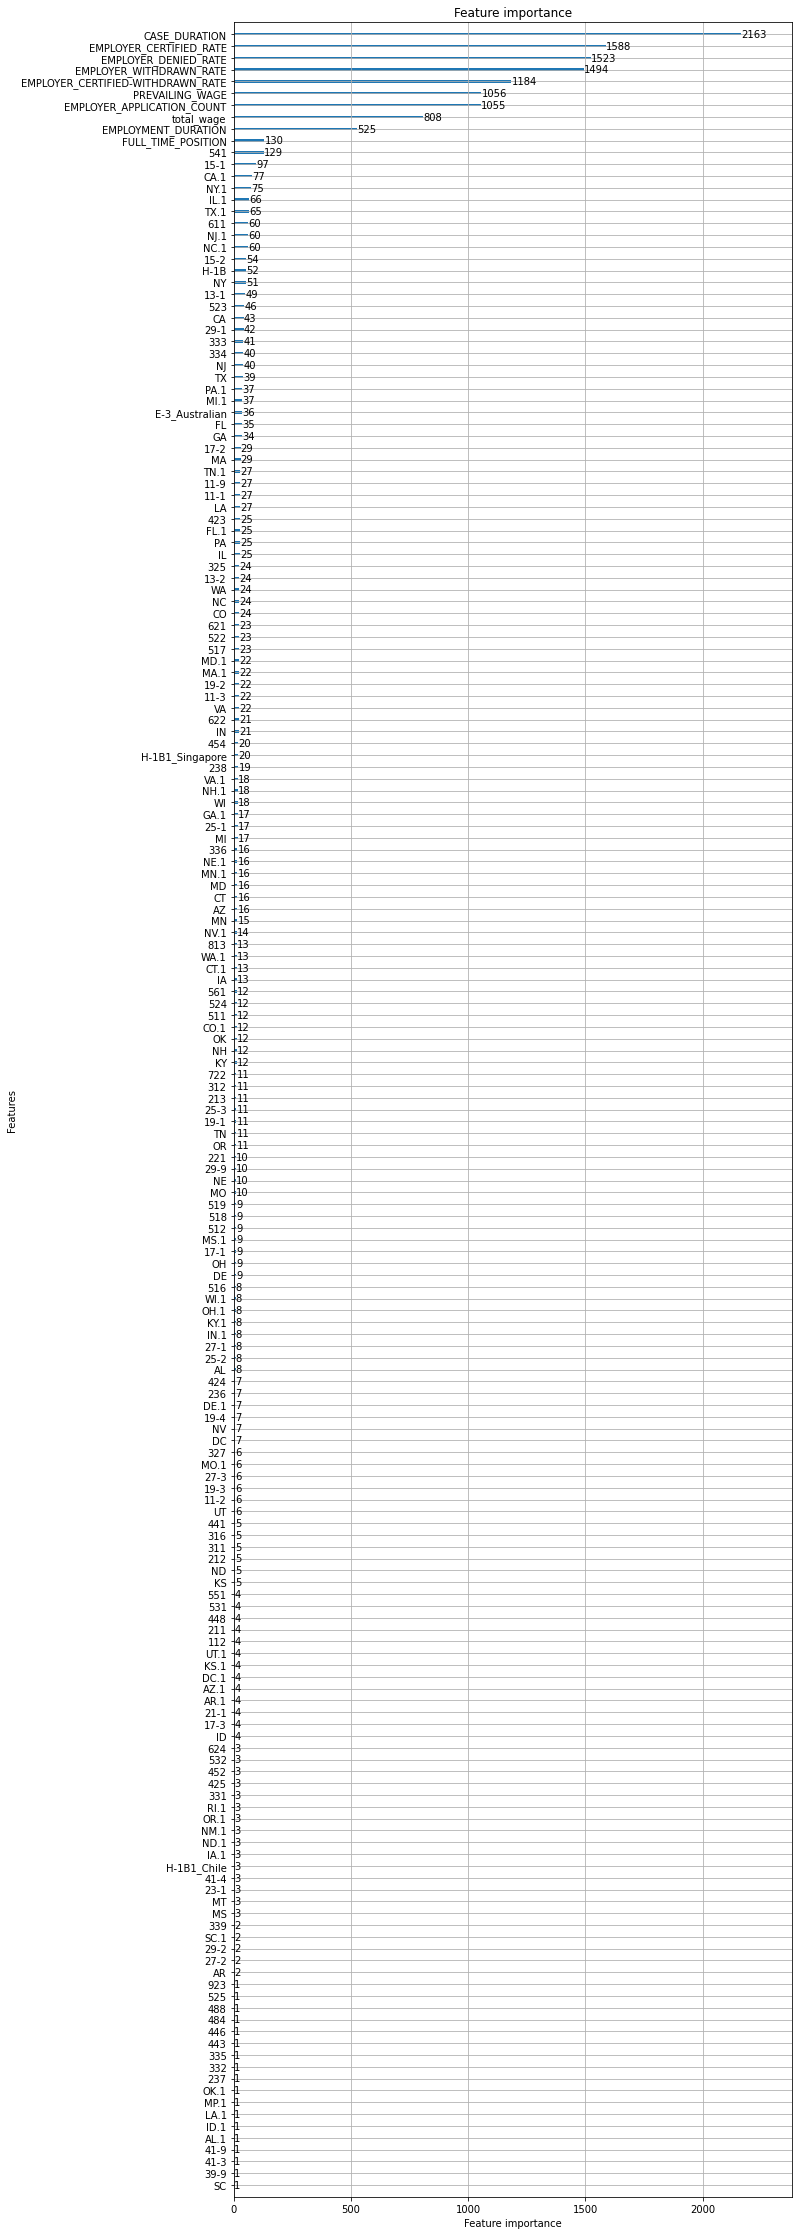

In [42]:
lightgbm.plot_importance(model, figsize=(10, 40))


4